In [2]:
%matplotlib inline
from math import sqrt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
try:
    sess.close()
except NameError:
    pass
sess = tf.InteractiveSession()

In [50]:
batch_size = 10
n_features = 2
cov_rank = 1
init_seed = 1

X = tf.placeholder(shape=(batch_size, n_features), dtype=tf.float32, name='X')


with tf.variable_scope('covariance'):
    # Parameterize a covariance matrix as the sum of a full rank positive diagonal
    # with low rank symmetric and positive semidefinite matrix
    # d and W can take arbitrary components values, C is garanteed to always be
    # symmetric and positive definite thanks to the parameterization.
    d = tf.Variable(tf.truncated_normal(shape=(n_features,),
                                        stddev=1 / sqrt(n_features),
                                        dtype=tf.float32,
                                        seed=init_seed),
                    name='d')
    W = tf.Variable(tf.truncated_normal(shape=(n_features, cov_rank),
                                        stddev=1 / sqrt(n_features),
                                        dtype=tf.float32,
                                        seed=init_seed),
                    name='W')

    C = tf.add(tf.diag(tf.exp(d)), tf.matmul(W, tf.transpose(W)), name='C')

sess.run(tf.initialize_all_variables())

In [51]:
C.eval()

array([[ 0.89256191, -0.60224104],
       [-0.60224104,  3.9590106 ]], dtype=float32)

In [56]:
tf.matrix_determinant(C).eval()

3.1709678

In [58]:
samples = np.random.multivariate_normal(np.zeros(n_features), C.eval(), size=10900)

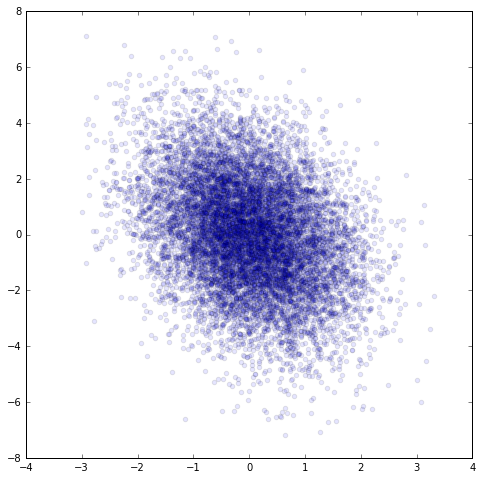

In [60]:
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1);

In [61]:
rng = np.random.RandomState(42)

X_data = rng.randn(batch_size, n_features)
X_data

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753],
       [-1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ]])

In [62]:
sess.run(tf.reduce_sum(tf.mul(X, tf.matmul(X, C)), reduction_indices=1),
         feed_dict={X: X_data})

array([  0.37862298,   8.36966896,   0.19993614,   3.09789181,
         1.66894901,   0.79044878,  15.10237885,   2.73915911,
         1.68993366,   7.08793879], dtype=float32)